```{include} ../math-definitions.md
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')


# Valores críticos de Perron
perronModelA = pd.DataFrame({
    '1%':[-4.30, -4.39, -4.39, -4.34, -4.32, -4.45, -4.42, -4.33, -4.27],
    '2.5%':[-3.93, -4.08, -4.03, -4.01, -4.01, -4.09, -4.07, -3.99, -3.97],
    '5%': [-3.68, -3.77, -3.76, -3.72, -3.76, -3.76, -3.80, -3.75, -3.69],
    '10%':[-3.40, -3.47, -3.46, -3.44, -3.46, -3.47, -3.51, -3.46, -3.38],
    '90%':[-1.38, -1.45, -1.43, -1.26, -1.17, -1.28, -1.42, -1.46, -1.37],
    '95%':[-1.09, -1.14, -1.13, -0.88, -0.79, -0.92, -1.10, -1.13, -1.04],
    '97.5%':[-0.78, -0.90, -0.83, -0.55, -0.49, -0.60, -0.82, -0.89, -0.74],
    '99%':[-0.46, -0.54, -0.51, -0.21, -0.15, -0.26, -0.50, -0.57, -0.47]},
    index = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

perronModelB = pd.DataFrame({
    '1%':[ -4.27, -4.41, -4.51, -4.55, -4.56, -4.57, -4.51, -4.38, -4.26],
    '2.5%':[ -3.94, -4.08, -4.17, -4.20, -4.26, -4.20, -4.13, -4.07, -3.96],
    '5%':[ -3.65, -3.80, -3.87, -3.94, -3.96, -3.95, -3.85, -3.82, -3.68],
    '10%':[ -3.36, -3.49, -3.58, -3.66, -3.68, -3.66, -3.57, -3.50, -3.35],
    '90%':[ -1.35, -1.48, -1.59, -1.69, -1.74, -1.71, -1.61, -1.49, -1.34],
    '95%':[ -1.04, -1.18, -1.27, -1.37, -1.40, -1.36, -1.28, -1.16, -1.04],
    '97.5%':[ -0.78, -0.87, -0.97, -1.11, -1.18, -1.11, -0.97, -0.87, -0.77],
    '99%':[ -0.40, -0.52, -0.69, -0.75, -0.82, -0.78, -0.67, -0.54, -0.43]},
    index = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

perronModelC = pd.DataFrame({
    '1%':[-4.38, -4.65, -4.78, -4.81, -4.90, -4.88, -4.75, -4.70, -4.41],
    '2.5%':[-4.01, -4.32, -4.46, -4.48, -4.53, -4.49, -4.44, -4.31, -4.10],
    '5%':[-3.75, -3.99, -4.17, -4.22, -4.24, -4.24, -4.18, -4.04, -3.80],
    '10%':[-3.45, -3.66, -3.87, -3.95, -3.96, -3.95, -3.86, -3.69, -3.46],
    '90%':[-1.44, -1.60, -1.78, -1.91, -1.96, -1.93, -1.81, -1.63, -1.44],
    '95%':[-1.11, -1.27, -1.46, -1.62, -1.69, -1.63, -1.47, -1.29, -1.12],
    '97.5%':[-0.82, -0.98, -1.15, -1.35, -1.43, -1.37, -1.17, -1.04, -0.80],
    '99%':[-0.45, -0.67, -0.81, -1.04, -1.07, -1.08, -0.79, -0.64, -0.50]},
    index = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Cambio estructural y raíces unitarias: fecha conocida



## Cambio estructural y raíces unitarias

Cuando se realizan pruebas de raíz unitaria, debe tenerse cuidado si se sospecha que ha ocurrido un cambio estructural.

Cuando hay cambios estructurales, los estadísticos Dickey-Fuller están sesgados hacia no rechazar la hipótesis de que hay raíz unitaria.



## Ejemplos de cambios estructurales

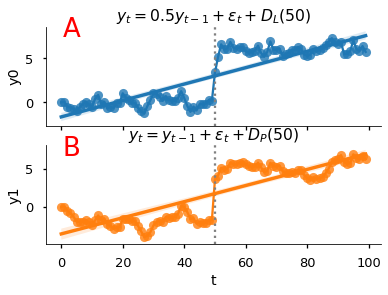

In [2]:
np.random.seed(2020)

T = 100
data2 = pd.DataFrame({'t':np.arange(T), 'e':0.5*np.random.randn(T),'y0':0.0, 'y1':0.0})
data2['DL'] = 3*(data2['t']>=T/2).astype(int)
data2['DP'] = 5*(data2['t']==int(T/2)).astype(int)

for t in range(1,T):
    data2.loc[t,'y0'] = 0.5 * data2.loc[t-1,'y0'] + data2.loc[t,'e'] + data2.loc[t,'DL']
    data2.loc[t,'y1'] = data2.loc[t-1,'y1'] + data2.loc[t,'e'] + data2.loc[t,'DP']

fig, axs = plt.subplots(2,1, sharex=True)
axs = data2[['y0', 'y1']].plot(subplots=True, ax=axs, legend=False)
for ax in axs:
    ax.axvline(T/2, ls=':', color='gray')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

axs[0].set(title='$y_t = 0.5y_{t-1} + \epsilon_t + D_L(50)$')    
axs[1].set(title='$y_t = y_{t-1} + \epsilon_t + D_P(50)$')    

axs[0].annotate('A',[0.05,0.9], xycoords='axes fraction', size=26, color='red')
axs[1].annotate('B',[0.05,0.9], xycoords='axes fraction', size=26, color='red')

sns.regplot(x='t',y='y0', data=data2, ax=axs[0], color='C0')
sns.regplot(x='t',y='y1', data=data2, ax=axs[1], color='C1');

Los datos de la figura {badge}`A, badge-danger` fueron generados por
\begin{align*}
y_t       &= 0.5y_{t-1} + \epsilon_{t} + 3D_L(50)_t \tag{AR(1) + cambio $\mu$}\\
D_L(50)_t &= \mathrm{I}(t\geq 50) \tag{dummy de nivel}
\end{align*}

La serie simulada parece tener una tendencia lineal.
La manera apropiada de estimar este modelo es
\begin{equation*}
y_t = \beta_0 + \beta_1y_{t-1} + \delta D_L(50) + \epsilon_{t}
\end{equation*}

pero si estimamos

\begin{equation*}
y_t = \alpha_0 + \alpha_1 t + \epsilon_{t}
\end{equation*}

el coeficiente $\alpha_1$ tendería a ser positivo para capturar el salto en la serie.


Suponga que por equivocación estimamos
\begin{equation*}
y_t - y_{t-1} = c + \gamma y_{t-1} + \epsilon_{t}
\end{equation*}
lo que sería una caminata aleatoria con deriva si $\gamma = 0$. Entonces:
\begin{equation*}
y_t = y_0 + ct + \sum_{i=i}^{t}\epsilon_{i}
\end{equation*}

Esta ecuación describe los datos de manera similar a como lo hace $y_t = \alpha_0 + \alpha_1 t + \epsilon_{t}$, lo cual nos dice que la regresión Dickey-Fuller sesgaría los resultados hacia $\gamma = 0$, es decir, hacia no rechazar la presencia de una raíz unitaria.

Perron (1989) demostró este sesgo con simulaciones de Monte Carlo.


Ahora bien, una serie con raíz unitaria también puede presentar un cambio estructural, como en la figura {badge}`B, badge-danger`, generada por
\begin{align*}
y_t &= y_{t-1} + \epsilon_{t} + 5D_P(50)_t \tag{RW + cambio $\mu$}\\
D_P(50)_t &= \mathrm{I}(t = 50) \tag{dummy de impulso}
\end{align*}

Note que $D_P(t)$ es igual a 1 solo en el período $t$: cualquier cambio aditivo a una caminata aleatoria tiene un efecto permanente sobre el nivel de la serie.

La serie simulada parece tener una tendencia lineal.
De hecho, no es sencillo distinguirla de la figura **A** a simple vista.


## ¿Cómo saber entonces si una serie con cambio estructural tiene raíz unitaria?

Una opción, similar a lo que hace la prueba de Chow, es partir la muestra de datos en dos partes, y realizar pruebas de raíz unitaria en cada una por separado
Lo malo de este procedimiento es que pierde muchos grados de libertad.
Sería preferible tener un test que utilice toda la muestra





## ¿Caminata aleatoria o serie estacionaria alrededor de tendencia?

\textcite{Perron1989} desarrolla un procedimiento formal para detectar raíces unitarias en presencia de un cambio estructural ocurrido en $t=\tau$.

Las hipótesis nula y alternativa son
\begin{align*}
y_t &= \alpha_0 + y_{t-1} + \mu_1 D^P_t(\tau) + \epsilon_{t} \tag{nula}\\
y_t &= \alpha_0 + \alpha_2 t + \mu_2 D^L_t(\tau) + \epsilon_{t} \tag{alternativa}
\end{align*}

Es decir, la hipótesis nula es que hay un solo salto en una caminata aleatoria en el período $\tau$, la alternativa es que en esa misma fecha hay un solo salto en el intercepto de una serie estacionaria alrededor de tendencia.


Observemos que
\begin{equation*}
\sum_{k=1}^{t}D_p(\tau)_k = D_L(\tau)_t
\end{equation*}

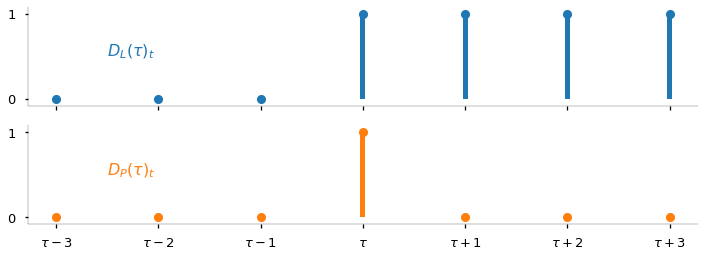

In [3]:
T = 7
data3 = pd.DataFrame(index=np.arange(T))
data3['DL'] = (data3.index>=3).astype(int)
data3['DP'] = (data3.index==3).astype(int)

fig, axs = plt.subplots(2,1,figsize=[12,4], sharex=True)
data3.plot.bar(subplots=True, width=0.05, ax=axs, legend=False)
data3.plot(subplots=True, ls='', marker='o', ax=axs, legend=False)
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.25)
    ax.spines['left'].set_linewidth(0.25)
    ax.set(yticks=[0,1], ylim=[-0.08, 1.08], title='')

axs[1].set_xticks(np.arange(T))
axs[1].set_xticklabels([f'$\\tau {tau:+d}$' if tau else '$\\tau$' for tau in range(-3,4)])
axs[0].annotate('$D_L(\\tau)_t$', [0.5, 0.5], size=16, color=axs[0].lines[0].get_color())
axs[1].annotate('$D_P(\\tau)_t$', [0.5, 0.5], size=16, color=axs[1].lines[0].get_color());

Integrando la hipótesis nula
\begin{equation*}
y_t = y_0 + \alpha_0 t + \mu_1D_L(\tau)_t + \sum_{k=0}^{t}\epsilon_{k}
\end{equation*}
vemos que es equivalente a la alternativa excepto por las perturbaciones.





## Las pruebas de cambio estructural de Perron


{{ empieza_test }} Las pruebas de cambio estructural de Perron {{ fin_titulo_test }}
::::{grid} 
:gutter: 1

:::{grid-item}
:outline: 
:columns: 4
{fas}`question;test-simbolo`
¿Hay raíces unitarias en presencia de un cambio estructural en $t=\tau$?
:::

:::{grid-item} 
:outline: 
:columns: 8
{fas}`bullseye;test-simbolo`
{bdg-success}`Modelo A: cambio de intercepto (crash)`
\begin{align*}
y_t &= \notationbrace{\alpha_0 + \mu_1 D^P_t}{intercepto} +  y_{t-1}  + \epsilon_{t} \tag{nula}\\
y_t &= \notationbrace{\alpha_0 + \mu_2 D_t^L}{intercepto} + \alpha_2 t  + \epsilon_{t} \tag{alternativa}
\end{align*}

{bdg-success}`Modelo B: cambio de tendencia (changing growth)`
\begin{align*}
y_t &= \notationbrace{\alpha_0 + \mu_2 D^L_t}{intercepto} +  y_{t-1}  + \epsilon_{t} \tag{nula}\\
y_t &= \alpha_0 + \notationbrace{\alpha_2 t + \mu_3 D^T_t}{tendencia} +  \epsilon_{t} \tag{alternativa}
\end{align*}
donde $D^T_t(\tau) = \max(t-\tau, 0)$

{bdg-success}`Modelo C: cambio de intercepto y de tendencia`
\begin{align*}
y_t &= \notationbrace{\alpha_0 + \mu_1 D^P_t + \mu_2 D^L_t}{intercepto} +  y_{t-1}  + \epsilon_{t} \tag{nula}\\
y_t &= \notationbrace{\alpha_0 + \mu_2 D_t^L}{intercepto} + \notationbrace{\alpha_2 t + \mu_3 D^T_t}{tendencia} +  \epsilon_{t} \tag{alternativa}
\end{align*}
:::

:::{grid-item} 
:outline: 
:columns: 8
{fas}`calculator;test-simbolo`
Para implementar la prueba de Perron se siguen 3 pasos:

{bdg-dark}`Paso 1:` Se estima la regresión correspondiente al modelo
\begin{align*}
y_t &= \alpha_0 + \alert{\alpha_1}y_{t-1} + \alpha_2 t + \mu_1 D_t^P + \mu_2 D_t^L  +\epsilon_{t} \tag{A} \\
y_t &= \alpha_0 + \alpha_2 t + \mu_3 D_t^T  + \tilde{y}_{t} \qquad\Rightarrow
\tilde{y}_t = \alert{\alpha_1}\tilde{y}_{t-1} + \epsilon_{t}  \tag{B}  \\
y_t &= \alpha_0 + \alert{\alpha_1}y_{t-1} + \alpha_2 t + \mu_1 D_t^P + \mu_2 D_t^L + \mu_3 D_t^L  +\epsilon_{t} \tag{C}\\
\end{align*}

{bdg-dark}`Paso 2:` Si los residuos de la regresión están autocorrelacionados, se estima la regresión ampliada, agregando $p$ rezagos del cambio en la variable:
\begin{align*}
\text{A y C} &:\sum_{i=1}^{p}\beta_i\Delta y_{t-1}  &
\text{B} &:\sum_{i=1}^{p}\beta_i\Delta \tilde{y}_{t-1}
\end{align*}

{bdg-dark}`Paso 3:` Se calcula el estadístico $t$ de la hipótesis $a_1=1$:
\begin{equation*}
t_{\alpha_1} = \frac{\hat{\alpha_1}-1}{s.e.(\alpha_1)}
\end{equation*}
y se compara con el valor crítico de Perron.
:::

:::{grid-item} 
:outline: 
:columns: 4
{fas}`lightbulb;test-simbolo` 
Si el estadístico estimado es menor que el valor crítico (ver tabla abajo), se rechaza la hipótesis nula.
:::
::::

El valor crítico depende de la proporción $\lambda$ de observaciones que corresponden al periodo anterior al quiebre estructural.

**Valores críticos de Perron**
::::{tab-set}

:::{tab-item} Modelo A
| 𝜆   |    1% |   2.5% |    5% |   10% |   90% |   95% |   97.5% |   99% |
|----:|------:|-------:|------:|------:|------:|------:|--------:|------:|
| 0.1 | -4.30 |  -3.93 | -3.68 | -3.40 | -1.38 | -1.09 |   -0.78 | -0.46 |
| 0.2 | -4.39 |  -4.08 | -3.77 | -3.47 | -1.45 | -1.14 |   -0.90 | -0.54 |
| 0.3 | -4.39 |  -4.03 | -3.76 | -3.46 | -1.43 | -1.13 |   -0.83 | -0.51 |
| 0.4 | -4.34 |  -4.01 | -3.72 | -3.44 | -1.26 | -0.88 |   -0.55 | -0.21 |
| 0.5 | -4.32 |  -4.01 | -3.76 | -3.46 | -1.17 | -0.79 |   -0.49 | -0.15 |
| 0.6 | -4.45 |  -4.09 | -3.76 | -3.47 | -1.28 | -0.92 |   -0.60 | -0.26 |
| 0.7 | -4.42 |  -4.07 | -3.80 | -3.51 | -1.42 | -1.10 |   -0.82 | -0.50 |
| 0.8 | -4.33 |  -3.99 | -3.75 | -3.46 | -1.46 | -1.13 |   -0.89 | -0.57 |
| 0.9 | -4.27 |  -3.97 | -3.69 | -3.38 | -1.37 | -1.04 |   -0.74 | -0.47 |
:::

:::{tab-item} Modelo B
| 𝜆   |    1% |   2.5% |    5% |   10% |   90% |   95% |   97.5% |   99% |
|----:|------:|-------:|------:|------:|------:|------:|--------:|------:|
| 0.1 | -4.27 |  -3.94 | -3.65 | -3.36 | -1.35 | -1.04 |   -0.78 | -0.40 |
| 0.2 | -4.41 |  -4.08 | -3.80 | -3.49 | -1.48 | -1.18 |   -0.87 | -0.52 |
| 0.3 | -4.51 |  -4.17 | -3.87 | -3.58 | -1.59 | -1.27 |   -0.97 | -0.69 |
| 0.4 | -4.55 |  -4.20 | -3.94 | -3.66 | -1.69 | -1.37 |   -1.11 | -0.75 |
| 0.5 | -4.56 |  -4.26 | -3.96 | -3.68 | -1.74 | -1.40 |   -1.18 | -0.82 |
| 0.6 | -4.57 |  -4.20 | -3.95 | -3.66 | -1.71 | -1.36 |   -1.11 | -0.78 |
| 0.7 | -4.51 |  -4.13 | -3.85 | -3.57 | -1.61 | -1.28 |   -0.97 | -0.67 |
| 0.8 | -4.38 |  -4.07 | -3.82 | -3.50 | -1.49 | -1.16 |   -0.87 | -0.54 |
| 0.9 | -4.26 |  -3.96 | -3.68 | -3.35 | -1.34 | -1.04 |   -0.77 | -0.43 |
:::

:::{tab-item} Modelo C
| 𝜆   |    1% |   2.5% |    5% |   10% |   90% |   95% |   97.5% |   99% |
|----:|------:|-------:|------:|------:|------:|------:|--------:|------:|
| 0.1 | -4.38 |  -4.01 | -3.75 | -3.45 | -1.44 | -1.11 |   -0.82 | -0.45 |
| 0.2 | -4.65 |  -4.32 | -3.99 | -3.66 | -1.60 | -1.27 |   -0.98 | -0.67 |
| 0.3 | -4.78 |  -4.46 | -4.17 | -3.87 | -1.78 | -1.46 |   -1.15 | -0.81 |
| 0.4 | -4.81 |  -4.48 | -4.22 | -3.95 | -1.91 | -1.62 |   -1.35 | -1.04 |
| 0.5 | -4.90 |  -4.53 | -4.24 | -3.96 | -1.96 | -1.69 |   -1.43 | -1.07 |
| 0.6 | -4.88 |  -4.49 | -4.24 | -3.95 | -1.93 | -1.63 |   -1.37 | -1.08 |
| 0.7 | -4.75 |  -4.44 | -4.18 | -3.86 | -1.81 | -1.47 |   -1.17 | -0.79 |
| 0.8 | -4.70 |  -4.31 | -4.04 | -3.69 | -1.63 | -1.29 |   -1.04 | -0.64 |
| 0.9 | -4.41 |  -4.10 | -3.80 | -3.46 | -1.44 | -1.12 |   -0.80 | -0.50 |
:::
::::
Fuente: \textcite{Perron1989}
{{ termina_test }}









{{ empieza_ejemplo }} Pruebas de cambio estructural {{ fin_titulo_ejemplo }}

Perron analiza los datos de Nelson y Plosser.

In [4]:
pd.options.plotting.backend = "plotly"

NP = pd.read_stata('https://github.com/randall-romero/econometria/raw/master/data/NelsonPlosserData.dta', index_col='year')
NP.index = NP.index.year

# modelo de salarios nominales
lwg = NP[['lwg']].dropna()
lwg['DL'] = (lwg.index > 1929).astype(int)
lwg['DP'] = (lwg.index == 1930).astype(int)
lwg['t'] = np.arange(lwg.shape[0])
lwg['Ly'] = lwg['lwg'].shift(1)
model1_lwg = ols('lwg~ DL + DP + t + Ly', lwg).fit()
model2_lwg = ols('lwg~ DL + t ', lwg).fit()

lwg['Ajuste'] = model2_lwg.fittedvalues

lwg[['lwg', 'Ajuste']].plot()

#title='Salarios nominales'

Al estimar el modelo A
\begin{equation*}
y_t = \alpha_0 + \alpha_1y_{t-1} + \alpha_2 t + \mu_1 D_t^P + \mu_2 D_t^L +\sum_{i=1}^{p}\beta_i\Delta y_{t-1}  +\epsilon_{t}
\end{equation*}

encuentran

In [5]:
def Perron_testA(serie, k=8):
    dta = NP[[serie]].dropna()
    dta.rename(columns={serie:'y'}, inplace=True)
    dta['DL'] = (dta.index>1929).astype(int)
    dta['DP'] = (dta.index==1930).astype(int)
    dta['t'] = np.arange(dta.shape[0])
    dta['Ly'] = dta['y'].shift(1)
    dta['Dy'] = dta['y'].diff(1)
    for j in range(1, k+1):
        dta[f'D{j}y'] = dta['Dy'].shift(j)

    lags = '+'.join(dta.columns[-k:])

    modelo = ols('y ~ DL + DP + t + Ly + '+ lags, dta).fit()
    tval = ((modelo.params - 1)/modelo.bse).round(2)['Ly']
    lda = 1-dta['DL'].mean()
    crit = perronModelA.loc[np.round(lda,1)]

    return {'𝜆': np.round(lda,2), 't': tval, '1%':crit['1%'],'5%':crit['5%'],'10%':crit['10%']}

variables = {'lrgnp':'Real GNP',
           'lgnp':'Nominal GNP',
           'lpcrgnp':'Real per capita GNP',
           'lip':'Industrial production',
           'lemp':'Employment',
           'lun':'Unemployment rate',
           'lprgnp':'GNP deflator',
           'lcpi':'Consumer prices',
           'lwg':'Wages',
           'lrwg':'Real wages',
           'lm':'Money stock',
           'lvel':'Velocity',
           'bnd':'Bond yield',
           'lsp500':'Common stock prices'}

seriesA = ['lrgnp', 'lgnp', 'lpcrgnp', 'lip', 'lemp', 'lprgnp', 'lcpi', 'lwg', 'lm']
lags = [8,8,7,8,7,5,2,7,6]

temp = pd.DataFrame([Perron_testA(ser, k) for ser, k in zip(seriesA, lags)], index=seriesA)
temp.rename(index=variables).to_latex('perron-nelson-plosser.tex', escape=False)

temp.rename(index=variables)


C:\Users\randa\AppData\Local\Temp\ipykernel_9992\2921144199.py:40: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



𝜆     t    1%    5%   10%
Real GNP               0.34 -5.03 -4.39 -3.76 -3.46
Nominal GNP            0.34 -5.42 -4.39 -3.76 -3.46
Real per capita GNP    0.34 -4.09 -4.39 -3.76 -3.46
Industrial production  0.63 -5.47 -4.45 -3.76 -3.47
Employment             0.49 -4.51 -4.32 -3.76 -3.46
GNP deflator           0.50 -4.04 -4.32 -3.76 -3.46
Consumer prices        0.63 -1.28 -4.45 -3.76 -3.47
Wages                  0.42 -5.41 -4.34 -3.72 -3.44
Money stock            0.50 -4.29 -4.32 -3.76 -3.46

{{ termina_ejemplo }}